In [1]:
# import graph tools
import numpy as np
from matplotlib import pyplot as plt
import os

In [13]:
def graph(filename, datatype):
  f = open(filename, 'r')
  n = np.empty(0)
  y = np.empty(0)
  first_skip = 0
  while True:
    if first_skip < 2:
      first_skip += 1
      line = f.readline()
      continue
    if not line: break
    line = f.readline()
    line = line.strip()
    line = line.split()
    if len(line) < 4: break
    n = np.append(n, int(line[0]))
    y = np.append(y, float(line[datatype]))

  f.close()

  return n, y



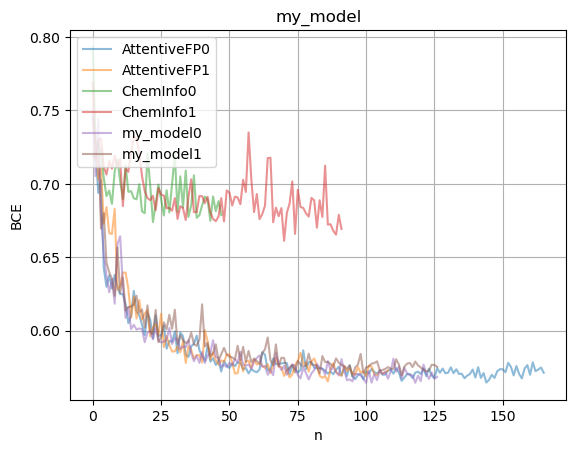

In [18]:
models = ['AttentiveFP', 'ChemInfo', 'my_model']
fig, axs = plt.subplots()


for model in models:
  path_dir = './' + model

  files = os.listdir(path_dir)

  x = np.arange(0, 150, 1)
  for i, filename in enumerate(files):
    n, y = graph(os.path.join(path_dir,filename), 2)
    axs.plot(n, y, alpha=0.5)
    axs.set_xlabel('n')
    axs.set_ylabel('BCE')
    axs.set_title(model)
    axs.grid(True)
axs.legend([model+str(time) for model in models for time in range(2)], loc='upper left')

plt.show()

In [108]:
def draw_mean_graph(axs, model, color='r', datatype=2):
  file_dir = ''
  if model == 'AttentiveFP':
    file_dir = './AttentiveFP/'
  elif model == 'ChemInfo':
    file_dir = './ChemInfo/'
  elif model == 'my_model':
    file_dir = './my_model/'

  file_list = os.listdir(file_dir)

  max_len = 0
  for i, filename in enumerate(file_list):
    n, y = graph(os.path.join(file_dir,filename), datatype)
    max_len = max(max_len, len(n))

  all_y = np.zeros(max_len)
  len_y = np.zeros(max_len)

  for i, filename in enumerate(file_list):
    n, y = graph(os.path.join(file_dir,filename), datatype)
    cnt_array = np.ones(len(n))
    if len(n) < max_len:
      cnt_array = np.pad(cnt_array, (0, max_len - len(n)), 'constant')
    len_y = np.vstack((len_y, cnt_array))

    if len(n) < max_len:
      y = np.pad(y, (0, max_len - len(n)), 'constant')
    all_y = np.vstack((all_y, y))
    
    if i > 36:
      break
  
  x = np.arange(0, max_len, 1)
  max_y = np.max(all_y)
  if datatype == 2:
    max_y = np.min(all_y)
  sd_y = np.std(all_y)
  all_y = np.sum(all_y, axis=0)
  len_y = np.sum(len_y, axis=0)
  y_mean = np.divide(all_y, len_y)
  axs.plot(x, y_mean, color, linewidth=10)

  return axs, model+" "+datatype2info[datatype]+" max: "+str(max_y)+" mean: "+str(y_mean[-1]) + " sd: " + str(sd_y)

my_model Accuracy max: 0.9 mean: 0.885 sd: 0.40722922858666377


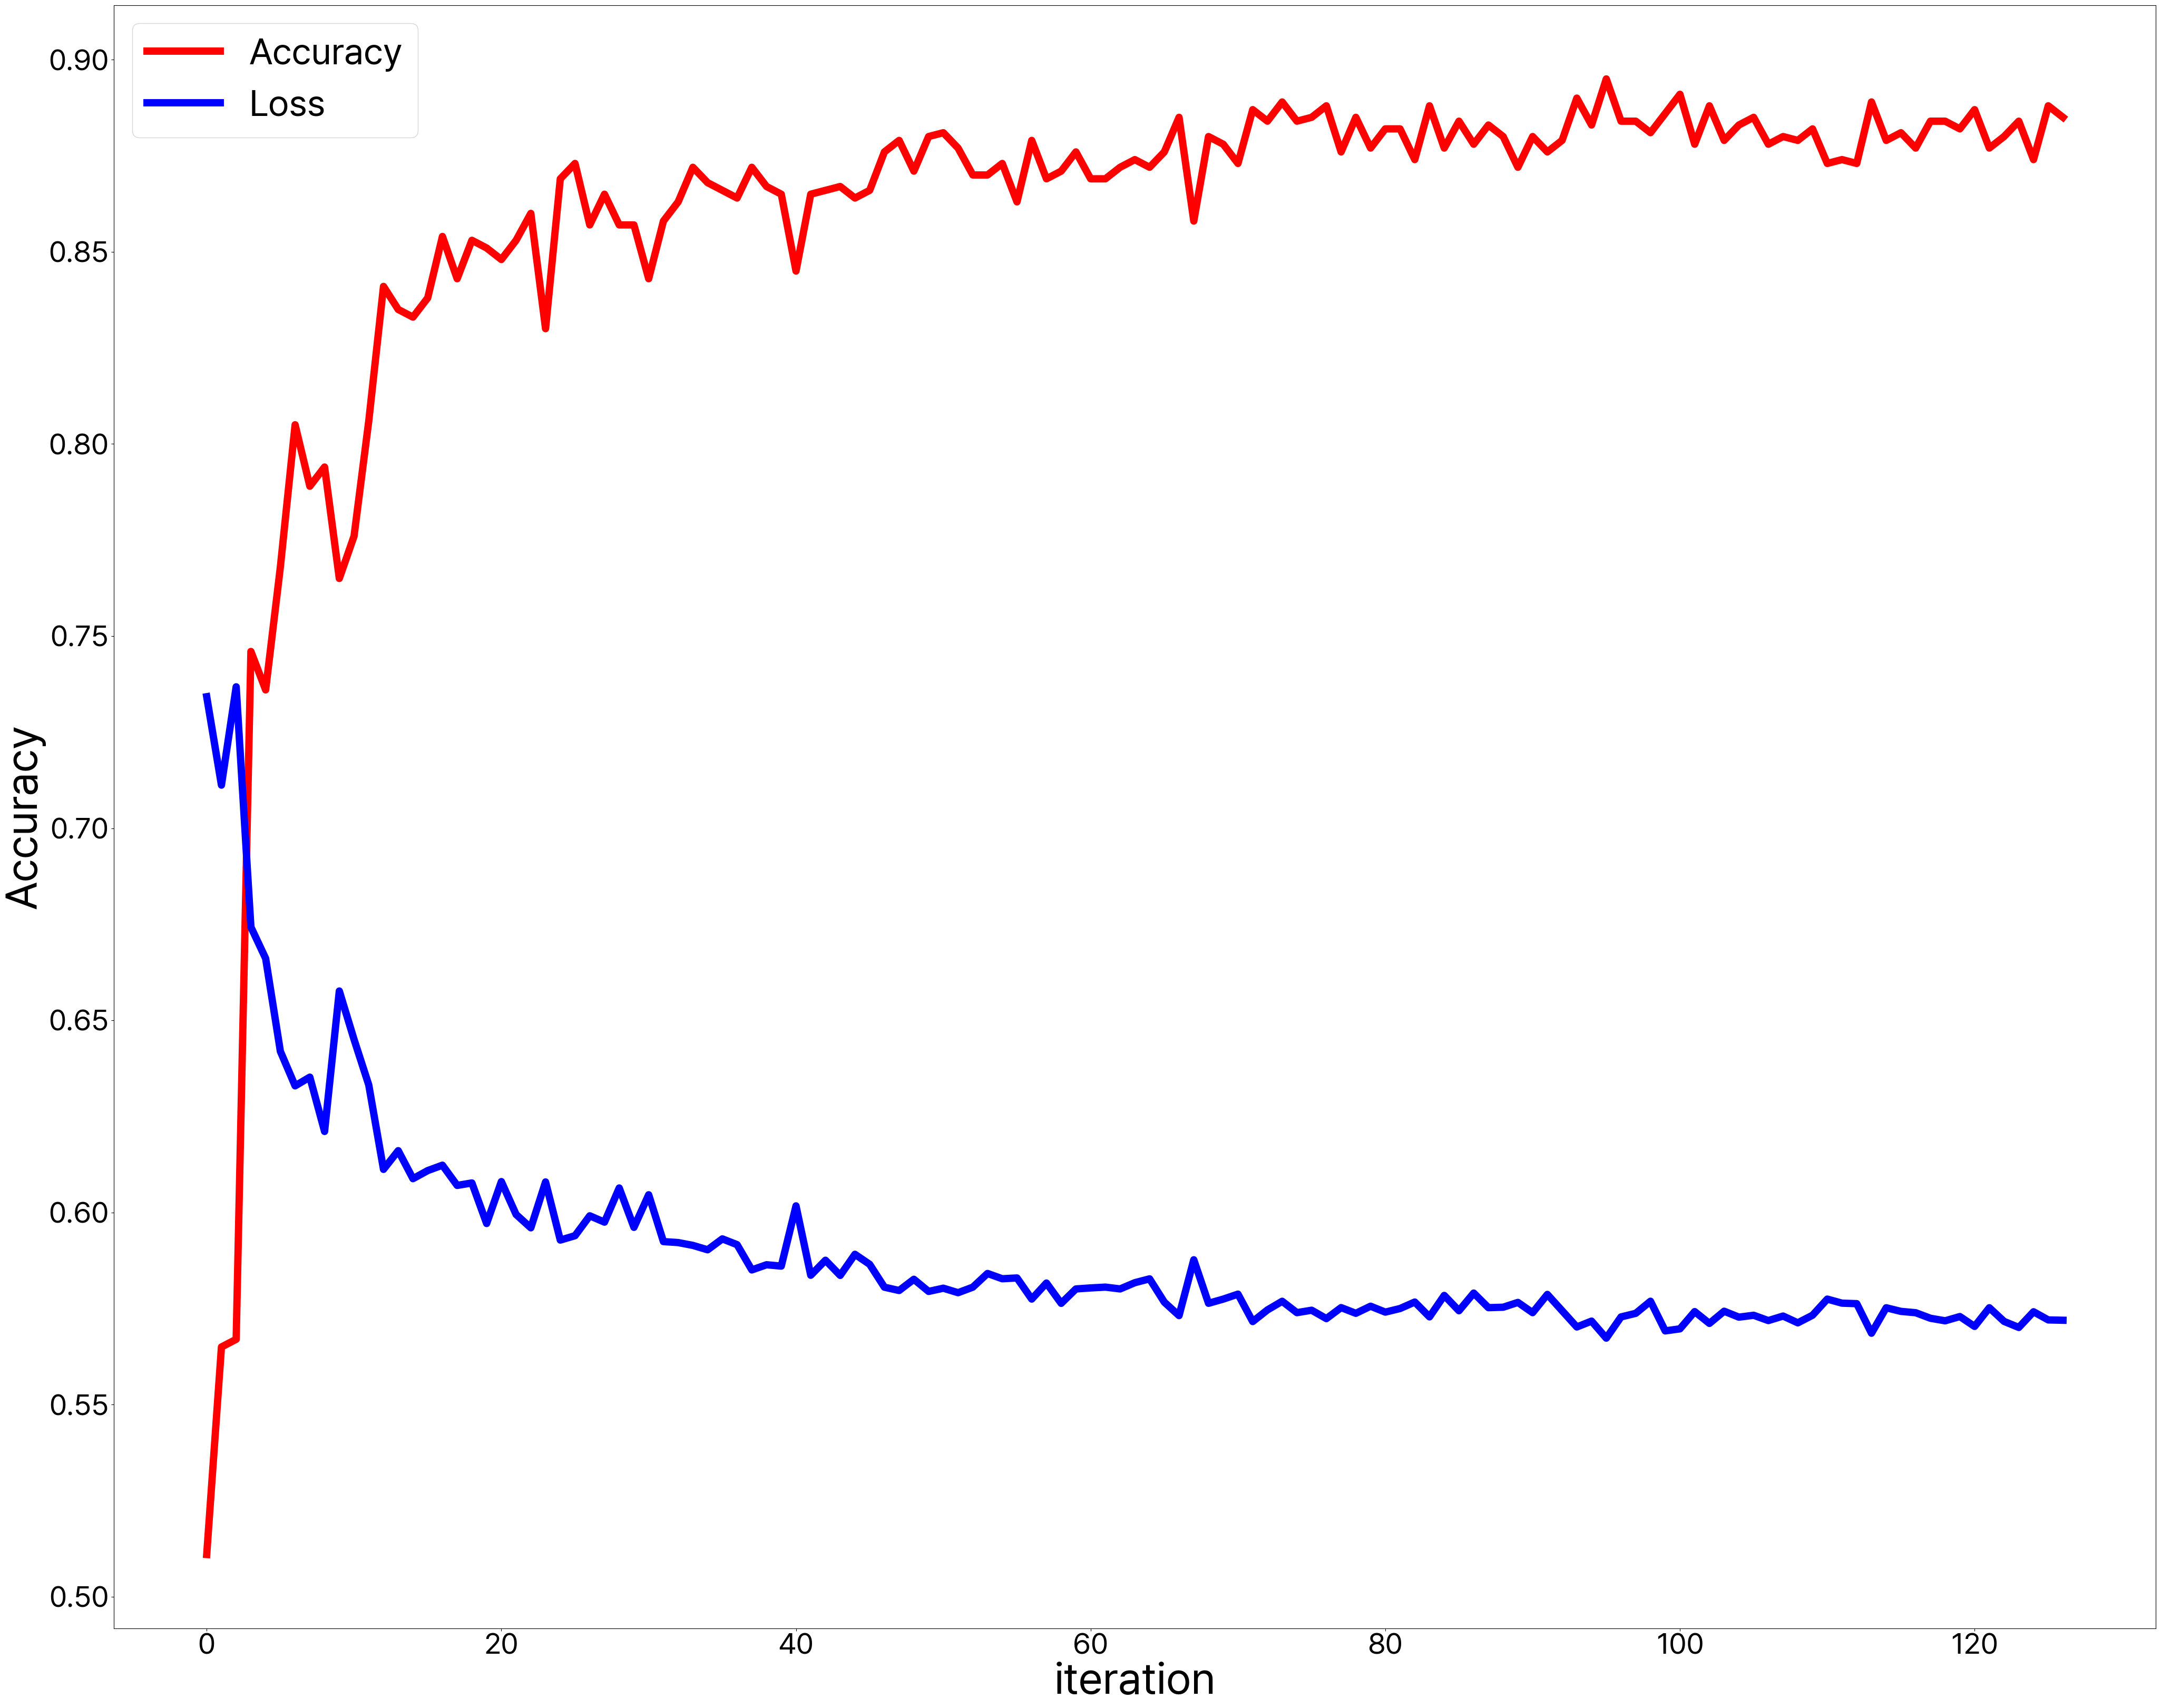

In [111]:
# models = ['AttentiveFP', 'ChemInfo', 'my_model']
models = ['my_model']
model2color = {'AttentiveFP':'b', 'ChemInfo':'g', 'my_model':'r'}
fig, axs = plt.subplots(figsize=(50, 40), dpi=100)

titlefont = {'fontname':'Pretendard', 'fontsize':'70'}
csfont = {'fontname':'Pretendard', 'fontsize':'60'}
axisfont = {'fontname':'Pretendard', 'fontsize':'40'}

datatype2info = {2: 'BCE', 4: 'R2', 6: 'Accuracy', 8: 'AUPRC', 10: 'AUROC'}

datatype = 6

for model in models:
  axs, info = draw_mean_graph(axs, model, model2color[model], datatype)
  draw_mean_graph(axs, model, 'b', 2)
  print(info)


# plt.title('Bitter Ensemble', **titlefont)
plt.xlabel('iteration', **csfont)
plt.ylabel(datatype2info[datatype], **csfont)
plt.legend(['Accuracy', 'Loss'], loc='upper left', prop={'size': 50, 'family':'Pretendard'})
plt.xticks(**axisfont)
plt.yticks(**axisfont)


plt.show()